In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
data=pd.read_csv("carprices2.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
data=data.drop(columns=['CarName','symboling','car_ID'])
data.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data=pd.get_dummies(data)
data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,False,False,False,False,False,False,True,False,False


In [8]:
num_values=[col for col in data.columns if data[col].dtype!='O']
category_values=[col for col in data.columns if data[col].dtype=='O']

In [11]:
X=data[num_values]
y=data.price
X.head()
X = (X - X.mean()) / X.std()
X = X.values
y = y.values.reshape(-1, 1)

In [12]:
split_point = int(len(X) * 0.8)
indices = np.random.permutation(len(X))
train_idx, test_idx = indices[:split_point], indices[split_point:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


In [13]:
def compute_cost(X, y, weights):
    m = len(y)
    predictions = np.dot(X, weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(X, weights)
        gradients = (1 / m) * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradients
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

In [14]:
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
initial_weights = np.zeros((X_train_bias.shape[1], 1))
learning_rate = 0.01
iterations = 2000
final_weights, cost_history = gradient_descent(X_train_bias, y_train, initial_weights, learning_rate, iterations)

In [21]:
def predict(X, weights):
    return np.dot(X, weights)
y_pred_gd = predict(X_test_bias, final_weights)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [22]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)
print(f"Gradient Descent - Mean Squared Error: {mse_gd}")
print(f"Gradient Descent - R2 Score: {r2_gd}")

Gradient Descent - Mean Squared Error: 379653.80127648235
Gradient Descent - R2 Score: 0.9950334543447398


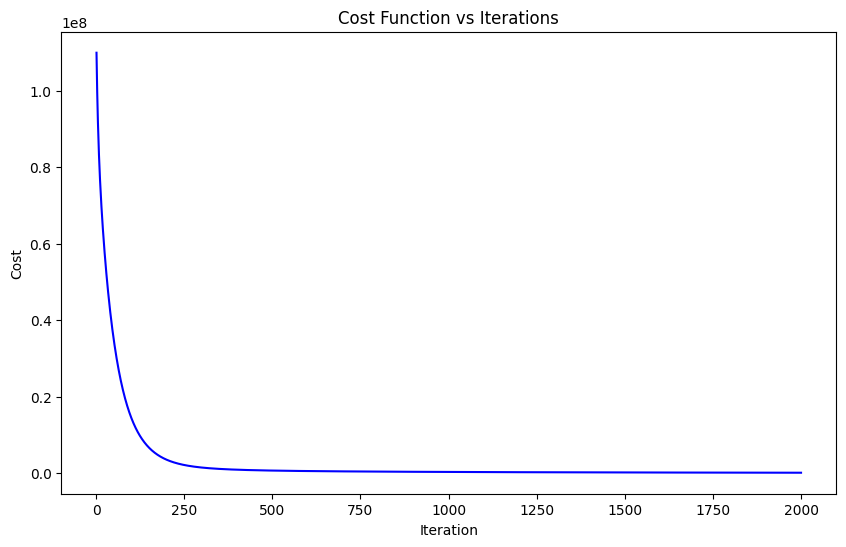

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()

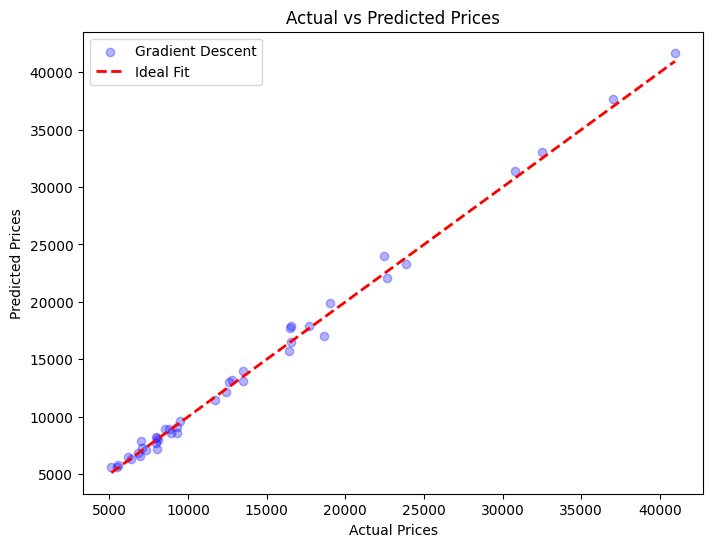

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd, alpha=0.3, color="blue", label="Gradient Descent")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()